In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, binarize
from scipy.spatial.distance import pdist, squareform, cosine, jaccard

In [2]:
# Load Iris Dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 1. Metric Proximities
def compute_metric_proximities(X):
    # Euclidean Distance
    euclidean_dist = squareform(pdist(X, metric='euclidean'))

    # Manhattan Distance
    manhattan_dist = squareform(pdist(X, metric='cityblock'))

    return euclidean_dist, manhattan_dist

In [5]:

# 2. Non-Metric Proximities
def compute_non_metric_proximities(X):
    # Binary Encoding (using median as threshold)
    X_binary = binarize(X, threshold=np.median(X, axis=0))

    # Jaccard Similarity
    jaccard_sim = 1 - squareform(pdist(X_binary, metric='jaccard'))

    # Cosine Similarity
    cosine_sim = 1 - squareform(pdist(X, metric='cosine'))

    return jaccard_sim, cosine_sim

In [6]:
# 3. Visualization Function
def plot_proximity_heatmap(proximity_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(proximity_matrix, cmap='YlGnBu', annot=False,
                xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [8]:
# 2. Non-Metric Proximities
def compute_non_metric_proximities(X):
    # Binary Encoding (using overall median as threshold)
    # Calculate the overall median across all features
    overall_median = np.median(X)

    X_binary = binarize(X, threshold=overall_median) # Use overall median

    # Jaccard Similarity
    jaccard_sim = 1 - squareform(pdist(X_binary, metric='jaccard'))

    # Cosine Similarity
    cosine_sim = 1 - squareform(pdist(X, metric='cosine'))

    return jaccard_sim, cosine_sim

In [9]:
# Compute Proximities
euclidean_dist, manhattan_dist = compute_metric_proximities(X_scaled)
jaccard_sim, cosine_sim = compute_non_metric_proximities(X_scaled)


Metric Proximities Visualization:


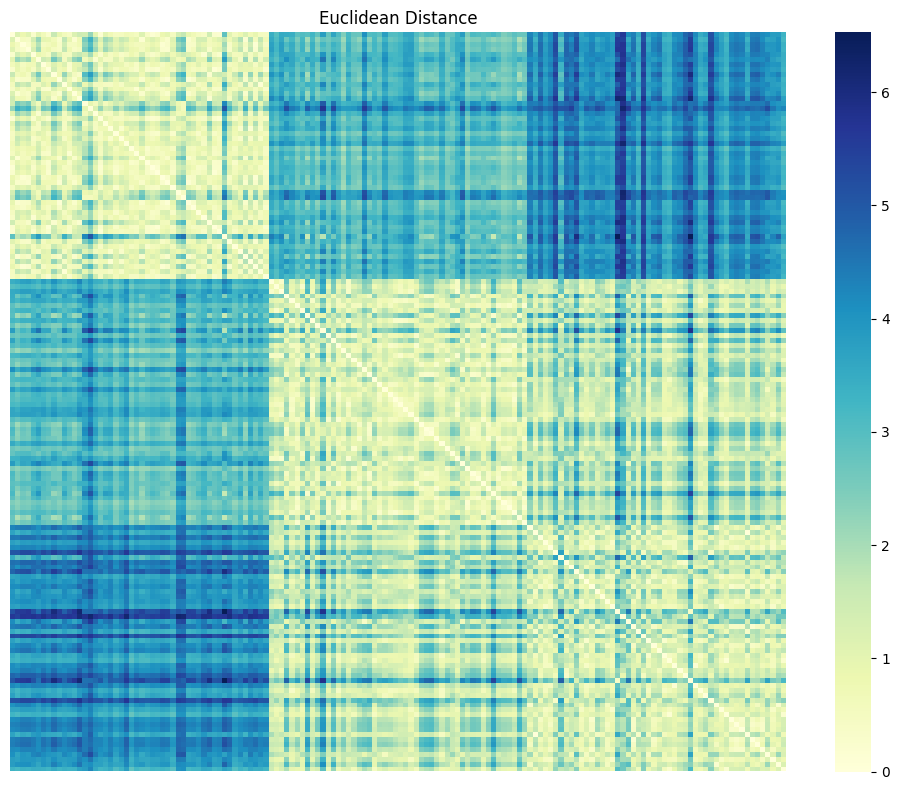

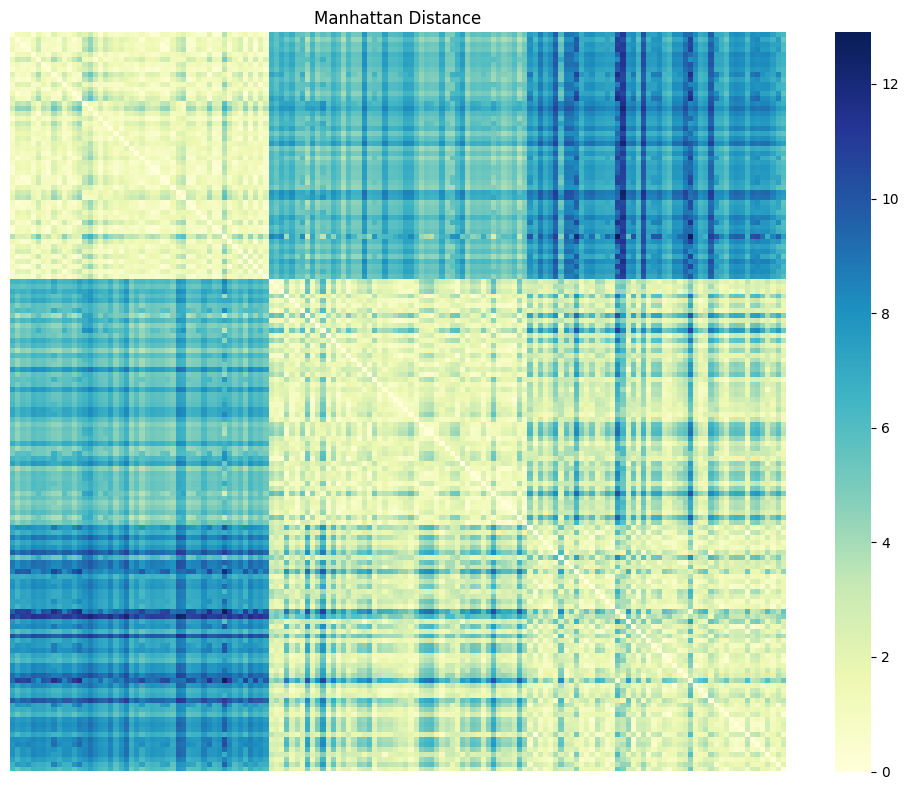


Non-Metric Proximities Visualization:


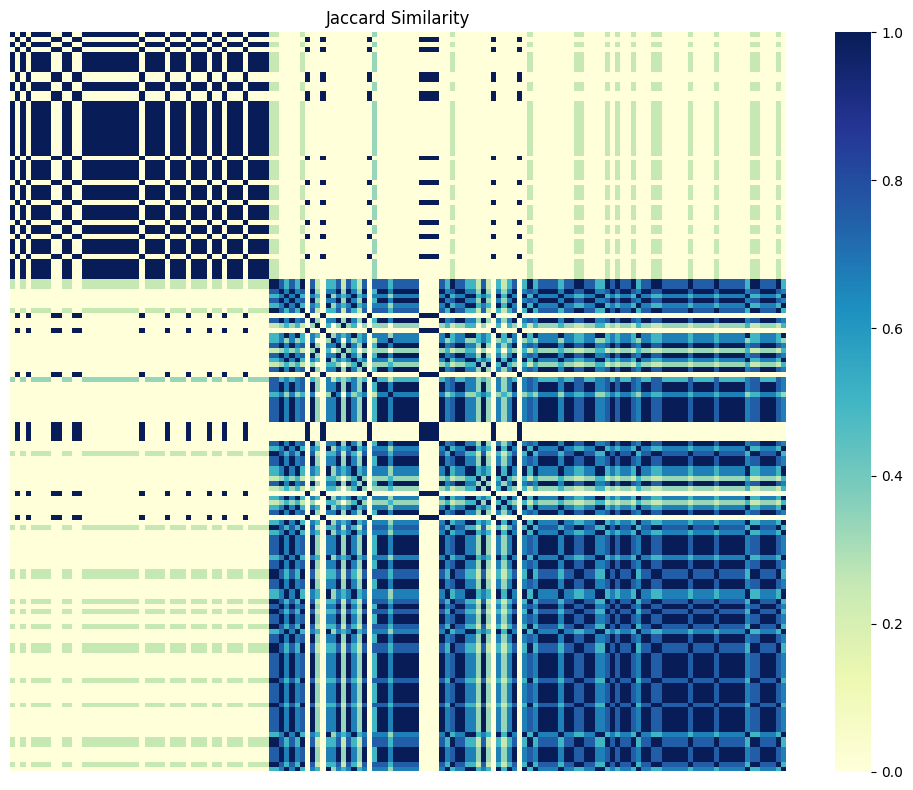

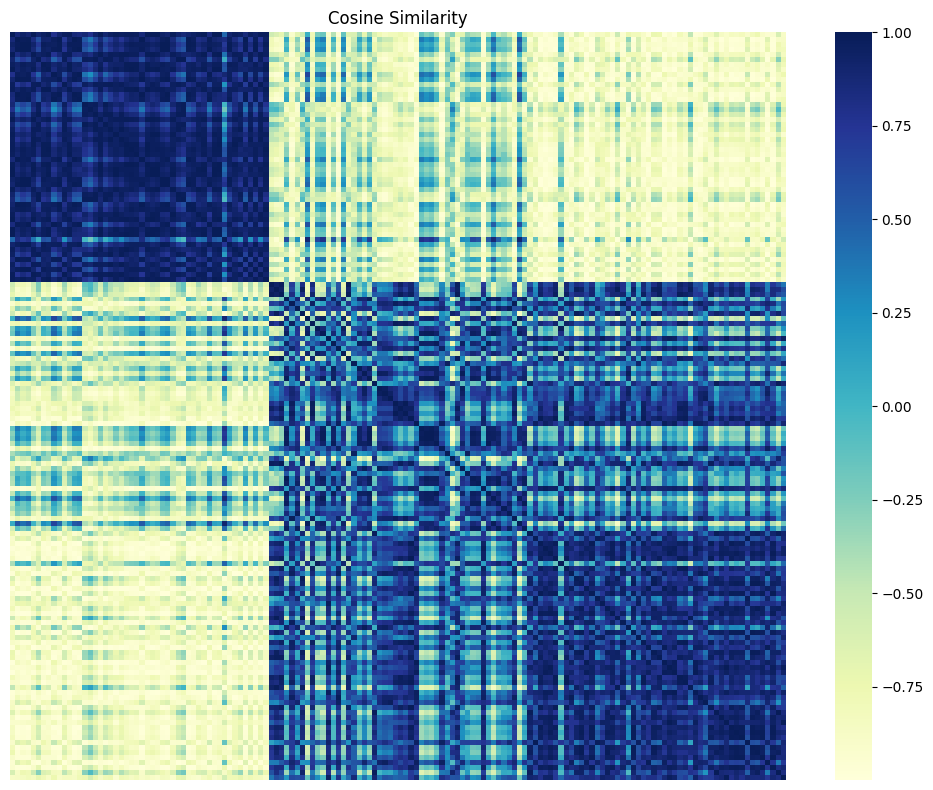

In [10]:
# Visualization
print("Metric Proximities Visualization:")
plot_proximity_heatmap(euclidean_dist, "Euclidean Distance")
plot_proximity_heatmap(manhattan_dist, "Manhattan Distance")

print("\nNon-Metric Proximities Visualization:")
plot_proximity_heatmap(jaccard_sim, "Jaccard Similarity")
plot_proximity_heatmap(cosine_sim, "Cosine Similarity")

In [12]:

# Print Summary Statistics
print("\nProximity Matrices Summary:")
proximity_matrices = {
    "Euclidean Distance": euclidean_dist,
    "Manhattan Distance": manhattan_dist,
    "Jaccard Similarity": jaccard_sim,
    "Cosine Similarity": cosine_sim
}

for name, matrix in proximity_matrices.items():
    print(f"\n{name}:")
    print(f"  Min: {matrix.min():.4f}")
    print(f"  Max: {matrix.max():.4f}")
    print(f"  Mean: {matrix.mean():.4f}")
    print(f"  Std Dev: {matrix.std():.4f}")


Proximity Matrices Summary:

Euclidean Distance:
  Min: 0.0000
  Max: 6.5293
  Mean: 2.4932
  Std Dev: 1.3356

Manhattan Distance:
  Min: 0.0000
  Max: 12.9006
  Mean: 4.5044
  Std Dev: 2.5943

Jaccard Similarity:
  Min: 0.0000
  Max: 1.0000
  Mean: 0.3725
  Std Dev: 0.4136

Cosine Similarity:
  Min: -0.9996
  Max: 1.0000
  Mean: 0.0264
  Std Dev: 0.7150
